#### Additional code for custom sequences

In [ ]:
#     #=== performance for custom sequences
#     #--- find sequences
#     c = pd.DataFrame()
#     for seq in sequences:
#         c[str(seq)] = (df_order['digitL'] == seq[0]) & (df_order['digitC'] == seq[1]) & (df_order['digitR'] == seq[2])
#     c = c.sum(axis=1).astype('bool')
    
#     #--- accuracy
#     accu[log_idx][3] = df_order['responseOrder.corr'][c].mean()
#     #--- penalized RT
#     prt[log_idx][3] = df_order_prt['responseOrder.rt'][c].mean()
#     #--- RT to correct responses
#     crt[log_idx][3] = df_order['responseOrder.rt'][c].mean()
# #--- specific sequences to be examined
# sequences = [[1,3,5],[2,4,6],[3,5,7],[4,6,8],[5,7,9],
#              [1,4,7],[3,6,9]]

#### Converting function from 3D numpy array to dataframe interpretable by Seaborn boxplot

In [4]:
def convert_dataframe(metric, metric_name):
    
    import pandas as pd
    #--- create new column type
    columnsDf=['orderType','4','5','6']
    #--- create empty df
    df = pd.DataFrame(columns=columnsDf)

    #--- write data
    for pData in metric:
        df = df.append(pd.DataFrame([['not in order', pData[0], pData[1], pData[2]], 
                                     ['decreasing',   pData[3], pData[4], pData[5]],
                                     ['increasing',   pData[6], pData[7], pData[8]]],
                                    columns=columnsDf), 
                       ignore_index=True)
    #--- melt orderType columns
    df = pd.melt(df, id_vars=['orderType'], value_vars=['4', '5', '6'], var_name='numDist')  
    df = df.rename(index=str, columns={'value': metric_name})
    #--- return result
    return df

In [1]:
%reset -f

#--- settings
top_dir = 'task_data_pilot/'
subs = ['002','003','004','005','006','007','008','009','010','011','012','013','014','015']
suffix = '_orderTask_'

In [29]:
import numpy as np
import pandas as pd
import os

#--- summary results arrays
accu = np.zeros((len(subs), 9))
prt = np.zeros((len(subs), 9))
crt = np.zeros((len(subs), 9))

#--- grab all files
logfiles = [file for sub in subs for file in os.listdir(top_dir) if f'{sub}{suffix}' in file if '.csv' in file]
print(f'Number of subjects: {len(logfiles)}')

for log_idx, logfile in enumerate(logfiles):
    print(f'Analyzing logfile {logfile}...')
    
    #--- read csv to dataframe
    df = pd.read_csv(os.path.join(top_dir,logfile))

    #--- divide according to condition
    df_order = df[df['trialsOrder.thisRepN'].notnull()]
    #df_control = df[df['trialsControl.thisRepN'].notnull()]
    #--- set 2s penality
    df_order_prt = df_order.copy()
    df_order_prt.loc[(df_order['responseOrder.rt'].isnull()) | (~df_order['responseOrder.corr'].astype('bool')), 'responseOrder.rt'] = 2

    #=== performance as a function of sequence type and numerical distance
    for idx, isOrder in enumerate([0,-1,1]):
        for idy, numDist in enumerate([4,5,6]):
            index = idx*3 + idy
            #--- accuracy
            accu[log_idx][index] = df_order['responseOrder.corr'][(df_order['isOrder'] == isOrder) & (df_order['numDist'] == numDist)].mean()
            #--- penalized RT
            prt[log_idx][index] = df_order_prt['responseOrder.rt'][(df_order['isOrder'] == isOrder) & (df_order['numDist'] == numDist)].mean()
            #--- RT to correct responses
            crt[log_idx][index] = df_order['responseOrder.rt'][(df_order['isOrder'] == isOrder) & (df_order['numDist'] == numDist)].mean()

Number of subjects: 14
Analyzing logfile 002_orderTask_2018_Oct_17_1313.csv...
Analyzing logfile 003_orderTask_2018_Oct_17_1405.csv...
Analyzing logfile 004_orderTask_2018_Oct_19_1003.csv...
Analyzing logfile 005_orderTask_2018_Oct_19_1105.csv...
Analyzing logfile 006_orderTask_2018_Oct_19_1132.csv...
Analyzing logfile 007_orderTask_2018_Oct_22_2301.csv...
Analyzing logfile 008_orderTask_2018_Oct_23_2120.csv...
Analyzing logfile 009_orderTask_2018_Oct_21_1540.csv...
Analyzing logfile 010_orderTask_2018_Oct_24_1009.csv...
Analyzing logfile 011_orderTask_2018_Oct_24_1026.csv...
Analyzing logfile 012_orderTask_2018_Oct_26_1323.csv...
Analyzing logfile 013_orderTask_2018_Oct_26_1349.csv...
Analyzing logfile 014_orderTask_2018_Oct_26_1447.csv...
Analyzing logfile 015_orderTask_2018_Oct_26_1505.csv...


In [36]:
df_order[(df_order['isOrder'] == 1) & (df_order['numDist'] == 6)]

,digitC,digitR,isTarget,isOrder,numDist,block,digitL,blocks.thisRepN,blocks.thisTrialN,blocks.thisN,...,responseOrder.rt,responseControl.keys,responseControl.corr,responseControl.rt,date,frameRate,expName,session,participant,Unnamed: 32
8,6,9,0,1,6,2,3,0,0,0,...,0.798885,NaN,NaN,NaN,2018_Oct_26_1505,60.003147,orderTask,1,15,NaN
53,4,7,1,1,6,3,1,2,0,2,...,0.865780,NaN,NaN,NaN,2018_Oct_26_1505,60.003147,orderTask,1,15,NaN


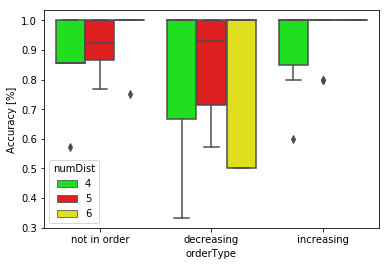

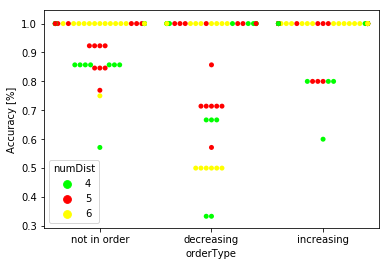

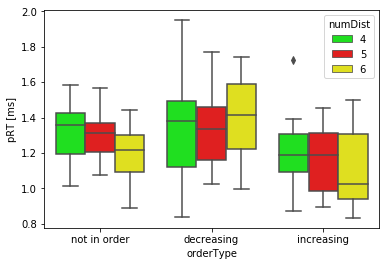

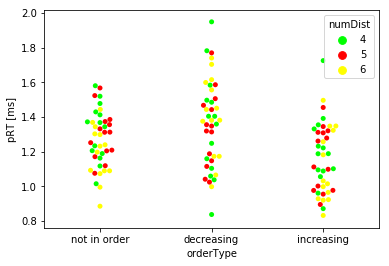

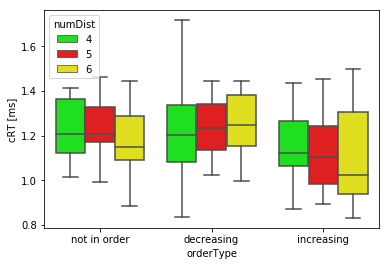

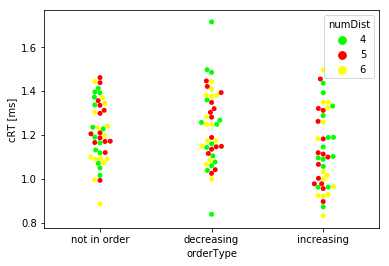

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#--- define colors for differen numDist
my_pal = {"4": [.75, 1, .5], 
          "5": [1, .75, .5], 
          "6": [.9, .9, .5]}
my_pal2 = {"4": [0, 1, 0], 
          "5": [1, 0, 0], 
          "6": [1, 1, 0]}
#--- do the conversion
accu_df = convert_dataframe(accu, 'Accuracy [%]')
prt_df = convert_dataframe(prt, 'pRT [ms]')
crt_df = convert_dataframe(crt, 'cRT [ms]')

#--- Fig. 1
plt.figure()
ax = sns.boxplot(x='orderType', y='Accuracy [%]', data=accu_df, hue='numDist', palette=my_pal2)
plt.savefig('ot_boxplot_accuracy.eps')

plt.figure()
ax = sns.swarmplot(x='orderType', y='Accuracy [%]', data=accu_df, hue='numDist', palette=my_pal2)
plt.savefig('ot_swarmplot_accuracy.eps')

#--- Fig. 2
plt.figure()
ax = sns.boxplot(x='orderType', y='pRT [ms]', data=prt_df, hue='numDist', palette=my_pal2)
plt.savefig('ot_boxplot_prt.eps')

plt.figure()
ax = sns.swarmplot(x='orderType', y='pRT [ms]', data=prt_df, hue='numDist', palette=my_pal2)
plt.savefig('ot_swarmplot_prt.eps')

#--- Fig. 3
plt.figure()
ax = sns.boxplot(x='orderType', y='cRT [ms]', data=crt_df, hue='numDist', palette=my_pal2)
plt.savefig('ot_boxplot_crt.eps')

plt.figure()
ax = sns.swarmplot(x='orderType', y='cRT [ms]', data=crt_df, hue='numDist', palette=my_pal2)
plt.savefig('ot_swarmplot_crt.eps')

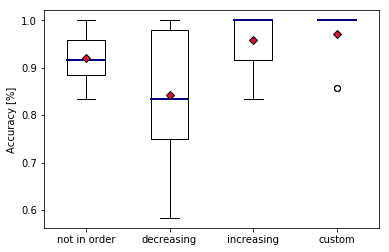

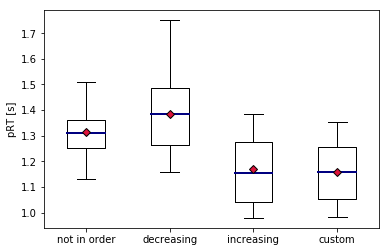

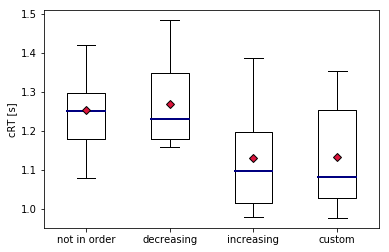

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

#--- some boxplot properties
medianprops = dict(linewidth=2, color='navy')
meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='crimson')

#--- Fig. 1
fig1, ax1 = plt.subplots()
ax1.boxplot(accu, medianprops=medianprops, meanprops=meanprops, 
            showfliers=True, showmeans=True, labels=['not in order', 'decreasing', 'increasing', 'custom'])
ax1.set_ylabel('Accuracy [%]');
fig1.savefig('beh_orderTask_accu.eps')

#--- Fig. 2
fig2, ax2 = plt.subplots()
ax2.boxplot(prt, medianprops=medianprops, meanprops=meanprops, 
            showfliers=True, showmeans=True, labels=['not in order', 'decreasing', 'increasing', 'custom'])
ax2.set_ylabel('pRT [s]');
fig2.savefig('beh_orderTask_pRT.eps')

#--- Fig. 3
fig3, ax3 = plt.subplots()
ax3.boxplot(crt, medianprops=medianprops, meanprops=meanprops, 
            showfliers=True, showmeans=True, labels=['not in order', 'decreasing', 'increasing', 'custom'])
ax3.set_ylabel('cRT [s]');
fig3.savefig('beh_orderTask_cRT.eps')

In [45]:
from scipy.stats import ttest_rel

print(accu)
ttest_rel(prt[:,0], prt[:,2])

[[0.91666667 0.75       0.91666667 1.        ]
 [0.875      0.75       1.         1.        ]
 [1.         1.         0.91666667 0.85714286]
 [0.95833333 1.         0.83333333 0.85714286]
 [0.83333333 0.58333333 1.         1.        ]
 [0.95833333 0.75       1.         1.        ]
 [0.95833333 0.91666667 1.         1.        ]
 [0.875      0.75       1.         1.        ]
 [0.91666667 1.         1.         1.        ]
 [0.91666667 0.91666667 0.91666667 1.        ]]


Ttest_relResult(statistic=3.332585038722704, pvalue=0.008762953671041601)